# SALES ANALYSIS

In this project, we will be analyzing a dataset that contains sales and customer data from a large supermarket chain. Our goal is to gain insights into customer behavior, purchasing patterns, and sales trends, in order to help the supermarket improve its operations and better serve its customers.

We will be using data analysis techniques like descriptive statistics and data visualization to understand the data and identify patterns and trends. Some of the key questions that we will be exploring include:

#### Here are a couple of questions we would be answering
* What are the most popular products among customers?
* What is the overall customer satisfaction?
* How can the supermarket optimize its tax planning and pricing to increase sales?


We believe that the insights gained from this analysis will be valuable for the supermarket, and we are excited to dive into the data and see what we can uncover. We hope that this project will serve as a valuable resource for the supermarket as it looks to improve its operations and better serve its customers.

#### Let us get started by importing important libraries

In [2]:
#Import necessary Libraries for data manipulation
import numpy as np
import pandas as pd

# Hiding warnings
import warnings
warnings.simplefilter('ignore')

#Import necessary Libraries for data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Reading the data
df= pd.read_csv('supermarket_sales - Sheet1.csv')


### Data description

The data includes 17 columns;

* Invoice ID: This is a computer generated invoice slip identification number
* Branch: The superstore has three brances; A, B and C
* City: Location of each supper stores
* Custormer type: Type of customers, recorded by Members for customers using member card and Normal for without member card
* Gender: Gender type of customer
* Product line: General item sold in the store categorization groups
* Unit price: Price of each unit of a product in $
* Quantity: Total number of products bought
* Tax 5%: 5% tax fee for customer buying
* Total: Total cost charged, including 5% tax
* Date and Time of the purchas
* Payment: Different payment methods used by customers
* Cost of goods sold(cog): Total cost of product without the 5% tax
* Gross profit margin
* Gross income: The difference between Total and Cogs(cost of goods sold)
* Ratings: Customer rates based on their experience, ranging from 0 to 10



In [68]:
# Displaying the first five rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data processing

In [12]:
# Getting the information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# Checking for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
# A quick statistical summary
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Exploratory Data Analysis

#### Question 1: What is the average unit price and total sales for each product line?

                        Unit price  Quantity
Product line                                
Electronic accessories       53.55       971
Health and beauty            54.85       854
Home and lifestyle           55.32       911
Food and beverages           56.01       952
Sports and travel            56.99       920
Fashion accessories          57.15       902


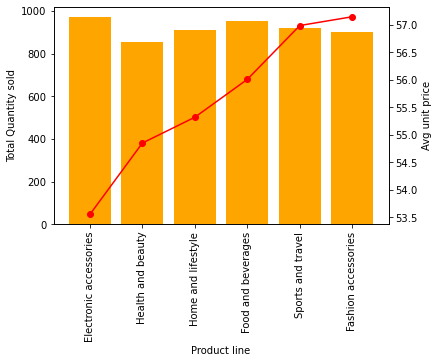

In [8]:
# Grouping the data by the quantity and average unit price of each product
Product_line= df.groupby('Product line').agg({'Unit price':'mean', 'Quantity':'sum'}).round(2).sort_values(by='Unit price')
print(Product_line)

# Ploting a bar chart that shows the total revenue generated (would be the first y-axis)
fig, ax1 = plt.subplots()
ax1.bar(Product_line.index, Product_line['Quantity'], color='orange')
ax1.set_xlabel('Product line')
ax1.set_ylabel('Total Quantity sold')
plt.xticks(rotation=90)


# Creating the second y-axis to show the average unit price
ax2 = ax1.twinx()
ax2.plot(Product_line.index, Product_line['Unit price'], '-o', color='r')
ax2.set_ylabel('Avg unit price')

plt.show()


#### Observations: 
With an average unit price of \$53.55, the Electronic accessories is the cheapest product line and has the highest quantity sold. We also see that with a relatively cheaper average unit price (54.85), the health and beauty product line had the lowest number of quantites sold


#### Question 2. What is the quantity of each goods sold, and how much revenue did each generate?

                        Quantity  gross income
Product line                                  
Electronic accessories       971       2587.50
Food and beverages           952       2673.56
Sports and travel            920       2624.90
Home and lifestyle           911       2564.85
Fashion accessories          902       2586.00
Health and beauty            854       2342.56


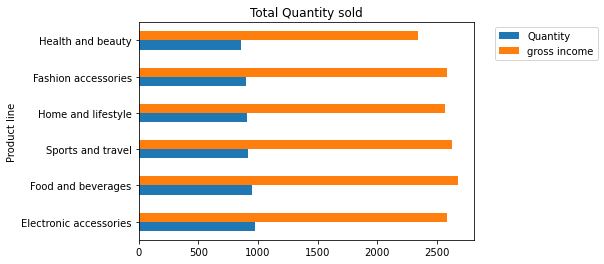

In [319]:
# Grouping products by quantities sold and the gross income
Product= df_analysis.groupby('Product line')['Quantity','gross income'].sum().round(2).sort_values(by='Quantity',ascending=False)
print(Product)

# Visualising the data in a bar chart
Product.plot(kind='barh', title = 'Total Quantity sold')

#Placing the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### Observations:

While the **Electronic accessories** sold the most quantiy, but it doesn't generate the most revenue. The **Food and Beverages** product line appears to generate highest gross income and the highest percentage contribution(over 13.3%) to the overall gross income. The **Health and Beauty** product line appears to be the least profitable, with the lowest gross income and the lowest percentage contribution to the overall gross income. 


#### Qusetion 3. What is the average gross income and gross margin of each product line?

Average gross margins and gross incomes for each product line:
                        gross margin percentage  gross income
Product line                                                 
Electronic accessories                     4.76         15.22
Fashion accessories                        4.76         14.53
Food and beverages                         4.76         15.37
Health and beauty                          4.76         15.41
Home and lifestyle                         4.76         16.03
Sports and travel                          4.76         15.81


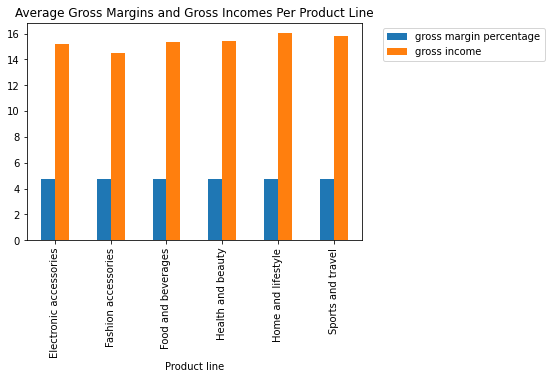

In [9]:
# Grouping the product line by the gross margin percentage and gross income
product_line_data = df.groupby('Product line')['gross margin percentage', 'gross income'].mean().round(2)

# print the average gross margins and gross incomes for each product line
print('Average gross margins and gross incomes for each product line:')
print(product_line_data)

# visualize the average gross margins and gross incomes for each product line
product_line_data.plot(kind='bar', title = 'Average Gross Margins and Gross Incomes Per Product Line')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### Observations:

From the data, we can see that all product lines have the same average gross margin percentage of 4.76%. This means that the company has the same profit margin for all product lines, regardless of the type of product. The gross income varies slightly between product lines, with the highest gross income being in the **Home and lifestyle** product line and the lowest being in the **Fashion accessories** product line.

#### Question 4: What is the average ratings for each product line?

Product line
Electronic accessories    6.9
Fashion accessories       7.0
Food and beverages        7.1
Health and beauty         7.0
Home and lifestyle        6.8
Sports and travel         6.9
Name: Rating, dtype: float64


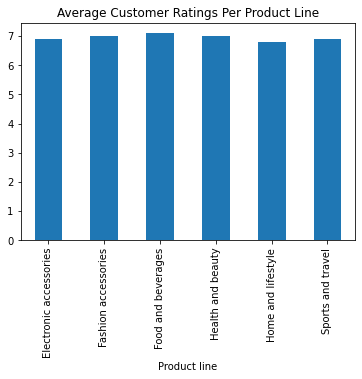

In [320]:
# group the data by product line and calculate the average customer rating for each product line
product_line_data1 = df.groupby('Product line')['Rating'].mean().round(1)
print(product_line_data1)

# visualize the average customer ratings for each product line
product_line_data1.plot(kind='bar', title = 'Average Customer Ratings Per Product Line')
plt.show()

#### Observations:

The Fashion accessories, Food and beverages, and Health and beauty product lines have better ratings than the other product lines, however the ratings overall is at medium range.


####  Question 5. What is the performace of each branch?

Branch
A    106200.37
B    106197.67
C    110568.71
Name: Total, dtype: float64


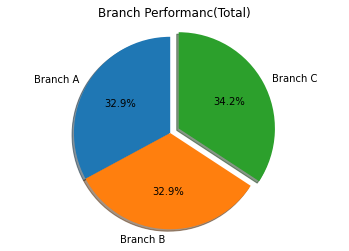

In [321]:
# Calculating the revenue contribution of each branch

# Grouping the data by the total revenue generated by each branch
Branch= df.groupby('Branch')['Total'].sum().round(2)
print(Branch)

# Visualisng branch performance
label=['Branch A','Branch B','Branch C']

plt.pie(Branch, labels=label, autopct='%1.1f%%', shadow=True,explode = (0, 0, 0.1), startangle=90)
plt.title('Branch Performanc(Total)')
plt.axis('equal')
plt.show()

* #### What is the total quantity of each goods sold by each branch?

Branch
A    1859
B    1820
C    1831
Name: Quantity, dtype: int64


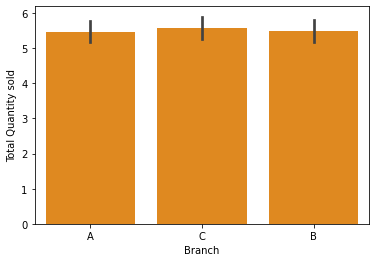

In [23]:
# Grouping the data by the quantity of each products sold by each branch
Branch= df.groupby(['Branch'])['Quantity'].sum()
print(Branch)

Branch = Branch.sort_values()

#Visualising the data
sns.barplot(x='Branch', y='Quantity', data=df, color = 'darkorange')
plt.xlabel('Branch')
plt.ylabel('Total Quantity sold')

plt.show()

* ####  What is the average ratings of each branch?

In [222]:
# Getting the average ratings for each Branch
Branch1= df.groupby('Branch')['Rating'].mean().round(2).reset_index()
Branch1

,Branch,Rating
0,A,7.03
1,B,6.82
2,C,7.07


#### Observation:
Overall, **Branch C** appears to be the best performing branch, contributing over 34.2% of the total revenue generated, and with the most average ratings, as well as selling the second highest number quantities across all product lines. **Branch A** has the most sales across all product lines, and the second highest ratings
#### Question 6: What is the best performing month?

       Date      Total
0  February   97219.37
1     March  109455.51
2   January  116291.87


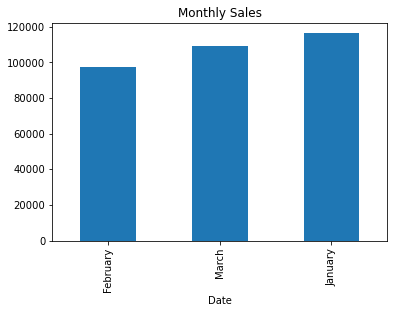

In [10]:
# convert the 'date' column to a datetime data type

df['Date'] = pd.to_datetime(df['Date'])
# group the DataFrame by 'date' and Total(sales)
monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum().round(2).sort_values()

print(monthly_sales.reset_index())

# visualize the monthly sales
monthly_sales.plot(kind='bar', title = 'Monthly Sales')
plt.show()

#### Observations:
We see here that there was a sharp fall in revenue generated in Febuary and an increase in March. Overall the company performed better in January and March. Since we do not have an historical data to analyse the Y.O.Y performance, we will keep monitoring the monthly revenue to understand the patterns.

#### Question 7: What is the average quantity sold each week?

In [13]:
# Calculating the total transactions per week
df['Date'] = pd.to_datetime(df['Date'])

# Grouping the data by the weekly quantity sold
transactions_per_week = df.groupby(df['Date'].dt.strftime('%U'))['Quantity'].sum().reset_index()

#Calculating the average quantity sold in a week
Avg_qty_sold=transactions_per_week['Quantity'].mean()
print("Overall average quantity sold weekly:", Avg_qty_sold)

# print the results
transactions_per_week


Overall average quantity sold weekly: 423.84615384615387


,Date,Quantity
0,00,253
1,01,433
2,02,455
3,03,458
4,04,489
5,05,526
6,06,382
7,07,334
8,08,429
9,09,532


#### Observation:
We see here that in some week the business sold as good as 532 products, while in some not so good week, the total quantity sold was about 253. Overrall, the business sold an average of 423 goods every week. 


#### Question 8. What is the spending sales by each customer type?

The average spending per customer type is:
  Customer type   Total
0        Member  327.79
1        Normal  318.12
The total gross income generated from each customer typer is:
  Customer type  gross income
0        Member       7820.16
1        Normal       7559.20


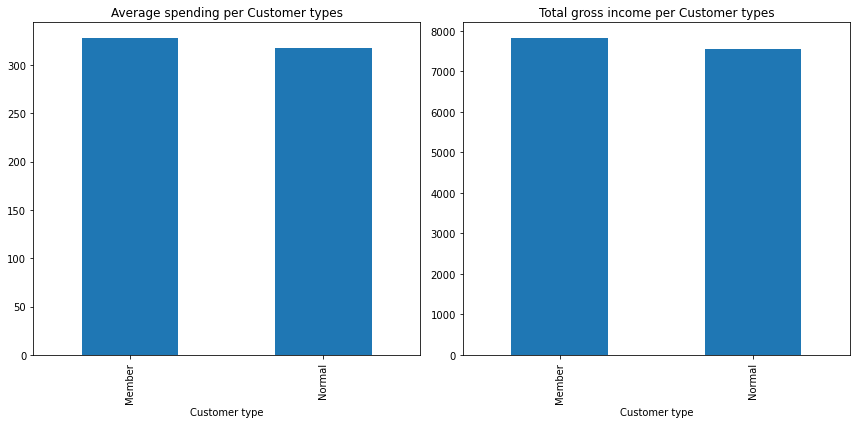

In [69]:
# Grouping the data by customer types and average total sales
Customer_types= df.groupby('Customer type')['Total'].mean().round(2)
print('The average spending per customer type is:')
print (Customer_types.reset_index())

# Grouping the data by customer types and the sum of gross income
Customer_typess= df.groupby('Customer type')['gross income'].sum().round(2)
print('The total gross income generated from each customer typer is:')
print (Customer_typess.reset_index())

# create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Visualising the data with a bar chart
Customer_types.plot(kind= 'bar', ax=axs[0], title = 'Average spending per Customer types')
Customer_typess.plot(kind= 'bar', ax=axs[1], title = 'Total gross income per Customer types')
plt.tight_layout()
plt.show()

#### Observations: 
The data shows that customers with the **Member status** tend to spend more (an average of $327.79) more than those with the **Normal status**, and they also contribute about 0.51% of the gross income. Overall, the **Member** customer types are out performing normal members.

#### Question 9:. What is the avarage spending and total gross income by each gender? Also, what quantity of each product is bought by each gender?

The average spending by each Gender type is:
         Total  Quantity
Gender                  
Female  335.10      2869
Male    310.79      2641
The total gross income generated from each Gender is:
   Gender  gross income
0  Female       7994.42
1    Male       7384.94


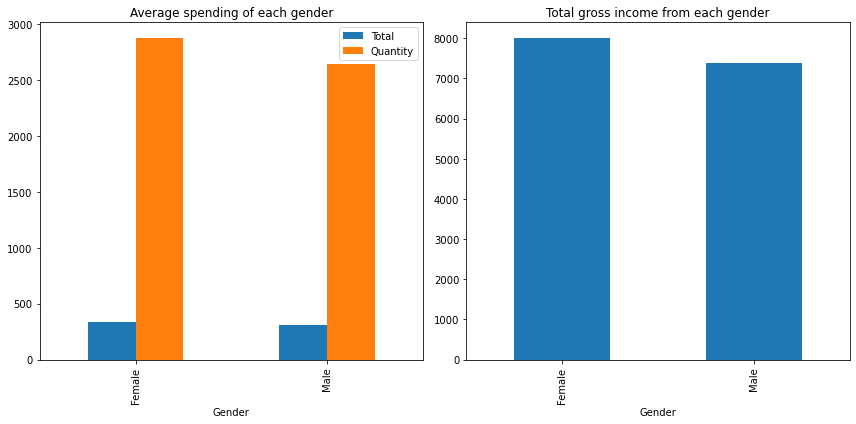

In [25]:
# Grouping the data by Genders and average total sales
Gender1= df.groupby('Gender').agg({'Total':'mean', 'Quantity':'sum'}).round(2)
print('The average spending by each Gender type is:')
print (Gender1)

# Grouping the data by Gender and the sum of gross income
Gender2= df.groupby('Gender')['gross income'].sum().round(2)
print('The total gross income generated from each Gender is:')
print (Gender2.reset_index())

# create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Visualising the data with a bar chart
Gender1.plot(kind= 'bar', ax=axs[0], title = 'Average spending of each gender')
Gender2.plot(kind= 'bar', ax=axs[1], title = 'Total gross income from each gender')
plt.tight_layout()
plt.show()

#### Observation:
The data shows that the female gender tend to patronise the business more, spending an average of $335.10 and buying over 2869 quantites of goods (228 more goods than the male gender). They also contribute more to the total gross income than the male gender.

#### Question 10: Whats the distribution of each product line among the gender?

    Gender            Product line  Quantity
0   Female  Electronic accessories       488
1   Female     Fashion accessories       530
2   Female      Food and beverages       514
3   Female       Health and beauty       343
4   Female      Home and lifestyle       498
5   Female       Sports and travel       496
6     Male  Electronic accessories       483
7     Male     Fashion accessories       372
8     Male      Food and beverages       438
9     Male       Health and beauty       511
10    Male      Home and lifestyle       413
11    Male       Sports and travel       424


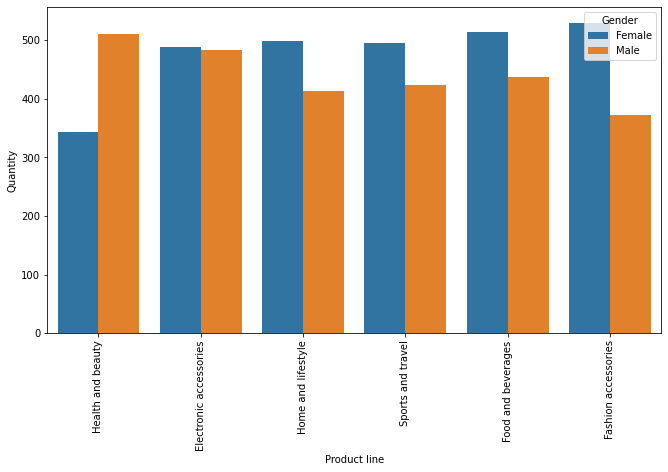

In [30]:
# Grouping the data by gender and product line
Gender3= df.groupby(['Gender','Product line'])['Quantity'].sum().reset_index()
print(Gender3)

# total sales for each gender by payment method
plt.figure(figsize = (11,6))
sns.barplot(x = 'Product line', y = 'Quantity', hue = 'Gender', data = df, ci = None, estimator = sum)
#Rotating the Xticks
plt.xticks(rotation=90)
plt.show()

#### Obeservations:

Excluding the Health and beauty product line, the female gender bought more products than the male gender in every other product line.

#### Question 11. What is the most payment method used?

Payment
Cash           1896
Credit card    1722
Ewallet        1892
Name: Quantity, dtype: int64


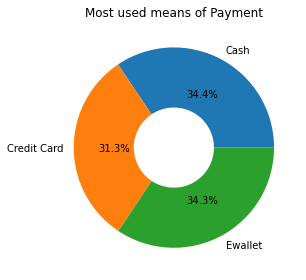

In [32]:
# Most used Payment methods
Payment=df.groupby('Payment')['Quantity'].sum()
print (Payment)

#Noting the various label types
label=['Cash','Credit Card','Ewallet']

#Visualising the data with a doughnut chart
plt.pie(Payment, labels=label, autopct='%1.1f%%')
#Plotting the inner circle of the doughnut chart
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Giving the graph a title
plt.title('Most used means of Payment')
plt.tight_layout()
plt.show()

* #### What is the most payment method used by each gender

Payment      Gender
Cash         Female    178
             Male      166
Credit card  Female    163
             Male      148
Ewallet      Male      185
             Female    160
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Payment', ylabel='Total'>

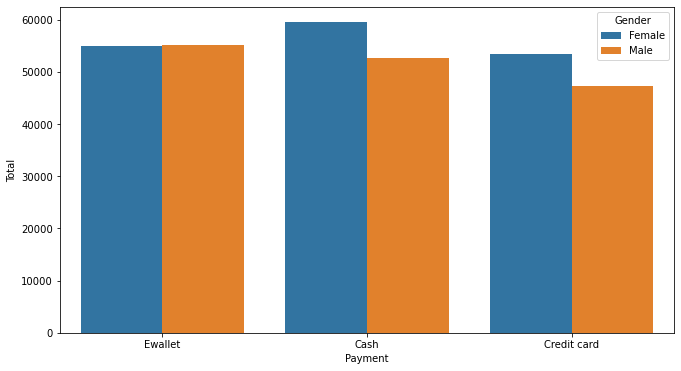

In [74]:
# Grouping the data by payment method used by each gender
Gender4= df.groupby('Payment')['Gender'].value_counts()
print(Gender4)

#Plotting a graph to show the total sales made with different cash methods
plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Gender', data = df, ci = None, estimator = sum)

* #### What is most payment method used by each customer types?

Payment      Customer type
Cash         Normal           176
             Member           168
Credit card  Member           172
             Normal           139
Ewallet      Normal           184
             Member           161
Name: Customer type, dtype: int64


<AxesSubplot:xlabel='Payment', ylabel='Total'>

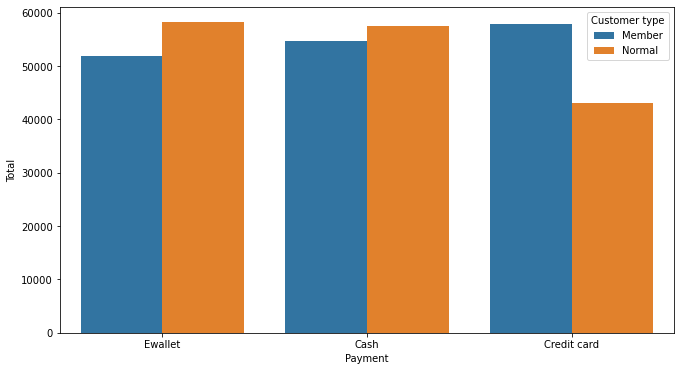

In [72]:
# Grouping the data by the payment methods used by each customer types
Customer= df.groupby('Payment')['Customer type'].value_counts()
print(Customer)

#Plotting a graph to show the total sales made using each payment methods by customer types
plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Customer type', data = df, ci = None, estimator = sum)

#### Observation:

The data shows that; 
* Cash is the most used means of payment, 34.4%, seconded by Ewallets at 34.3% and the the Credit card transactions at 31.3%.

* The female gender made most of their payments using cash(about 178 transactions), while the male gender made most of their payments using Ewallets(about 185 transactions).

* The Member type customers did more transactions using credit cards (172 transactions), while the Normal customer types used Ewallets more(184 transactions).

#### Question 12. What is the overall satisfaction level of customers?

In [180]:
bins = np.linspace(min(df["Rating"]), max(df["Rating"]), 4)

group_names = ['Low', 'Medium', 'High'] # let's set our group names

df['rating-binned'] = pd.cut(df['Rating'], bins, labels=group_names, include_lowest=True )
df[['Rating','rating-binned']].head(15)

,Rating,rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [231]:
# What is the overall ratings

df["rating-binned"].value_counts().reset_index()

,index,rating-binned
0,Medium,351
1,Low,341
2,High,308


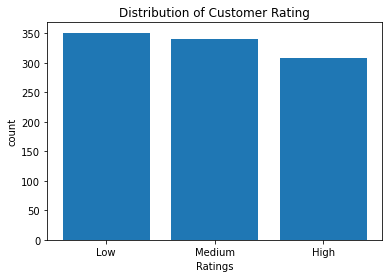

In [235]:
# Plotting the distribution of each bin
plt.bar(group_names, df["rating-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("Ratings")
plt.ylabel("count")
plt.title("Distribution of Customer Rating")
plt.show()


#### Observations:

The overall satisfaction level is at a medium ratings, falling around 6.8 to 8.0 ratings.


#### Question 13: What is the overall Gross margin percentage?

Gross margin percentage = (COGS - total revenue)/total revenue

In [25]:
# calculate the overall gross margin percentage

df['gross_margin'] = (df['Total'] - df['cogs']) / df['Total']
overall_gross_margin = df['gross_margin'].mean()
print(overall_gross_margin)

0.047619047619048616


#### Observation:

A gross margin of 0.047 means that out of the total revenue, only 4.76% is left after accounting for the COGS. This indicates a low level of profitability for the Supermarket.

#### Question 14. What is the relationship between the unit price ,quantity sold, and ratings?

In [201]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,rating-binned,Ratings bins
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,High,High
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,High,High
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Medium,Medium
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,High,High
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Low,Low


In [27]:
#Creating a dataframe that contains the unit price, quantity sold and ratings
df_corr= pd.DataFrame([df['Unit price'],df['Quantity'],df['Rating'], df['Tax 5%']]).transpose()
df_corr.head()

,Unit price,Quantity,Rating,Tax 5%
0,74.69,7.0,9.1,26.1415
1,15.28,5.0,9.6,3.8200
2,46.33,7.0,7.4,16.2155
3,58.22,8.0,8.4,23.2880
4,86.31,7.0,5.3,30.2085


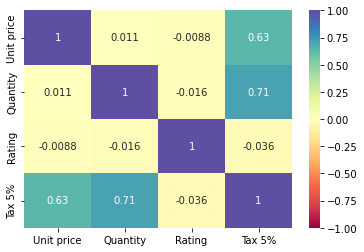

In [77]:
# Plotting a heatmap with seaborn to show the correlation between the unit price, quantity sold and ratings
sns.heatmap(df_corr.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

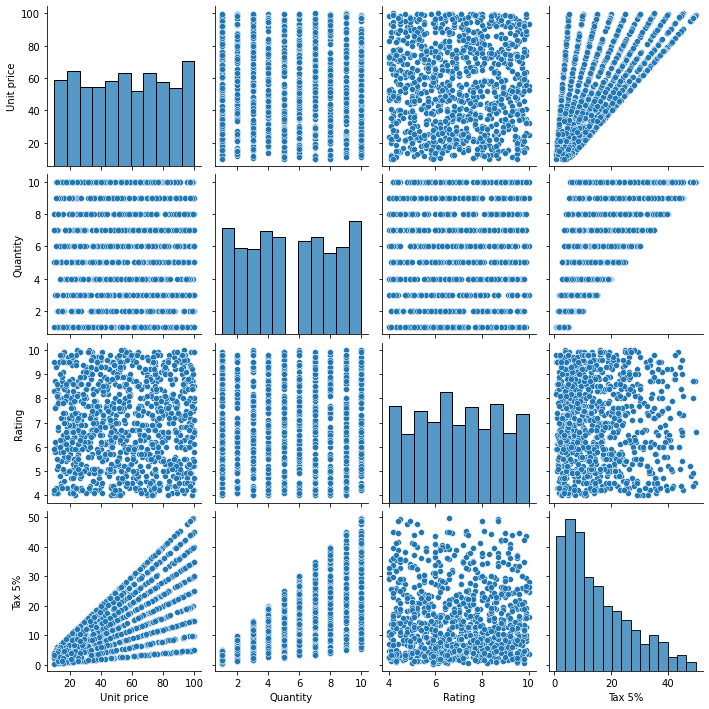

In [78]:
# Plotting a pairplot to give linear analysis of the relationships between the unit price, quantity sold and ratings
sns.pairplot(data=df_corr)

#### Observations:

* The data shows a 0.011 correlation between the quantity of goods sold and the unit price, indicating that there is a weak releationship between both variable. 

* There is also a -0.16 correlation between Ratings and the Quantity of goods sold, indicating that the quantity of goods bought by each customer isn't affected by the ratings.

* Also, a -0.088 correlation between Unit price and Ratings indicates that the customer ratings are not affected by the cost/price of the goods.

* However, there is a 0.71 correlation between the 5% tax rate and the quantity of goods sold, indicating that as Quantity increases, Tax 5% also increases.

* Also, Rating and Tax 5% have a strong negative correlation (-0.036442), indicating that as Tax 5% increases, Rating decreases.

### Recommendations:

* The supermarket should aim to encourage more customers to obtain membership status, as the data suggests that members tend to make more frequent purchases. This could be achieved through marketing and promotions.

* In order to drive revenue growth, each branch should be encouraged to increase sales for all product lines. This could be achieved through various means, such as providing better customer service, improving product displays, or offering product discounts.

* In order to improve its gross profit margin, the supermarket should focus on reducing its cost of goods sold. This could be achieved through cost-saving initiatives, such as negotiating better deals with suppliers or streamlining its inventory management processes.

* Finally, the supermarket should consider the importance of customer satisfaction in its tax planning. Given the weak negative correlation between customer satisfaction and tax liability, prioritizing customer satisfaction may have a positive impact on its tax bill. This could be achieved through initiatives such as improving customer service, offering promotions, or investing in customer experience technology.